In [1]:
%load_ext autoreload
%autoreload 2
from vpower.interp import SimulationParticles
import matplotlib.pyplot as plt
plt.style.use('niceplot2jay.mplstyle')

SNAPSHOT = '/appalachia/d5/DISK/from_pleiades/snapshots/gmcs0_wind0_gmc9/snapshot_550.hdf5'
simParticles = SimulationParticles.load_snapshot(SNAPSHOT)

In [10]:
import numpy as np
"Our pixel is {} times bigger than the smallest particles"\
.format(1/16384/np.min(simParticles.h()))

'Our pixel is 50.83025120016474 times bigger than the smallest particles'

In [36]:
smallPar = simParticles[simParticles.h() < 1/16384]
print("The number of particles with r < 1/16384 is {}, in fraction {:.2%}"\
.format(len(smallPar), len(smallPar)/len(simParticles)))
print("Have an average mass of {} and an average density of {}"\
.format(smallPar.mass.mean(), smallPar.density.mean()))
print("Compare to the average mass of {} and the average density of {}"\
.format(simParticles.mass.mean(), simParticles.density.mean()))

The number of particles with r < 1/16384 is 52713, in fraction 0.55%
Have an average mass of 4.465161724875131e-11 and an average density of 1209.079290204402
Compare to the average mass of 1.3096474963097345e-10 and the average density of 6.932348904835645


In [48]:
# Bring back Voxelize.
import vpower.voxelize
smallField = smallPar.voxelize_interp_to_field(Nsize=256, smoothing_rate=100)

Interpolating velocity field...
Padding:  0 Lbox:  1.0 Nsize:  256
Auto padding done. Time elapsed: 0.01 s


OMP: Info #277: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
root_add_process : started ...
workers_process : started ...
workers using 35 threads.
Workers processed 798071 numbers, of which were
	0.000e+00 exact calculations (R<Rmin),
	7.882e+05 exact calculations (R>Rmax),
	9.852e+03 trivial calculations,
	0.000e+00 interpolations.

workers_process : ended.
Root processed 798071 numbers in 35 CPU-chunks.
root_add_process : ended.
voxelize_gpu function took 0.1476 seconds
In the end, 0 in cpu_queue


Interpolation done. Time elapsed: 0.53 s


/appalachia/d6/yujie/Test_PowerSpec/vpower/interp.py:880: RuntimeWarning: invalid value encountered in divide
  vec_grid[:, :, :, 0] /= rho_grid
/appalachia/d6/yujie/Test_PowerSpec/vpower/interp.py:881: RuntimeWarning: invalid value encountered in divide
  vec_grid[:, :, :, 1] /= rho_grid
/appalachia/d6/yujie/Test_PowerSpec/vpower/interp.py:882: RuntimeWarning: invalid value encountered in divide
  vec_grid[:, :, :, 2] /= rho_grid


In [49]:
np.where(smallField.density() > 0)

(array([114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 115,
        115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115,
        115, 115, 115, 115, 115, 115, 116, 116, 116, 116, 116, 116, 116,
        116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116,
        117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117,
        117, 117, 117, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118,
        119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119,
        119, 119, 119, 119, 119, 119, 120, 120, 120, 120, 120, 120, 120,
        120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
        121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121,
        121, 121, 121, 121, 121, 121, 121, 122, 122, 122, 122, 122, 122,
        122, 122, 122, 130, 130, 130, 130, 130, 130, 130, 130, 131, 131,
        131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131,
        131, 131, 131, 131, 132, 132, 132, 132, 132

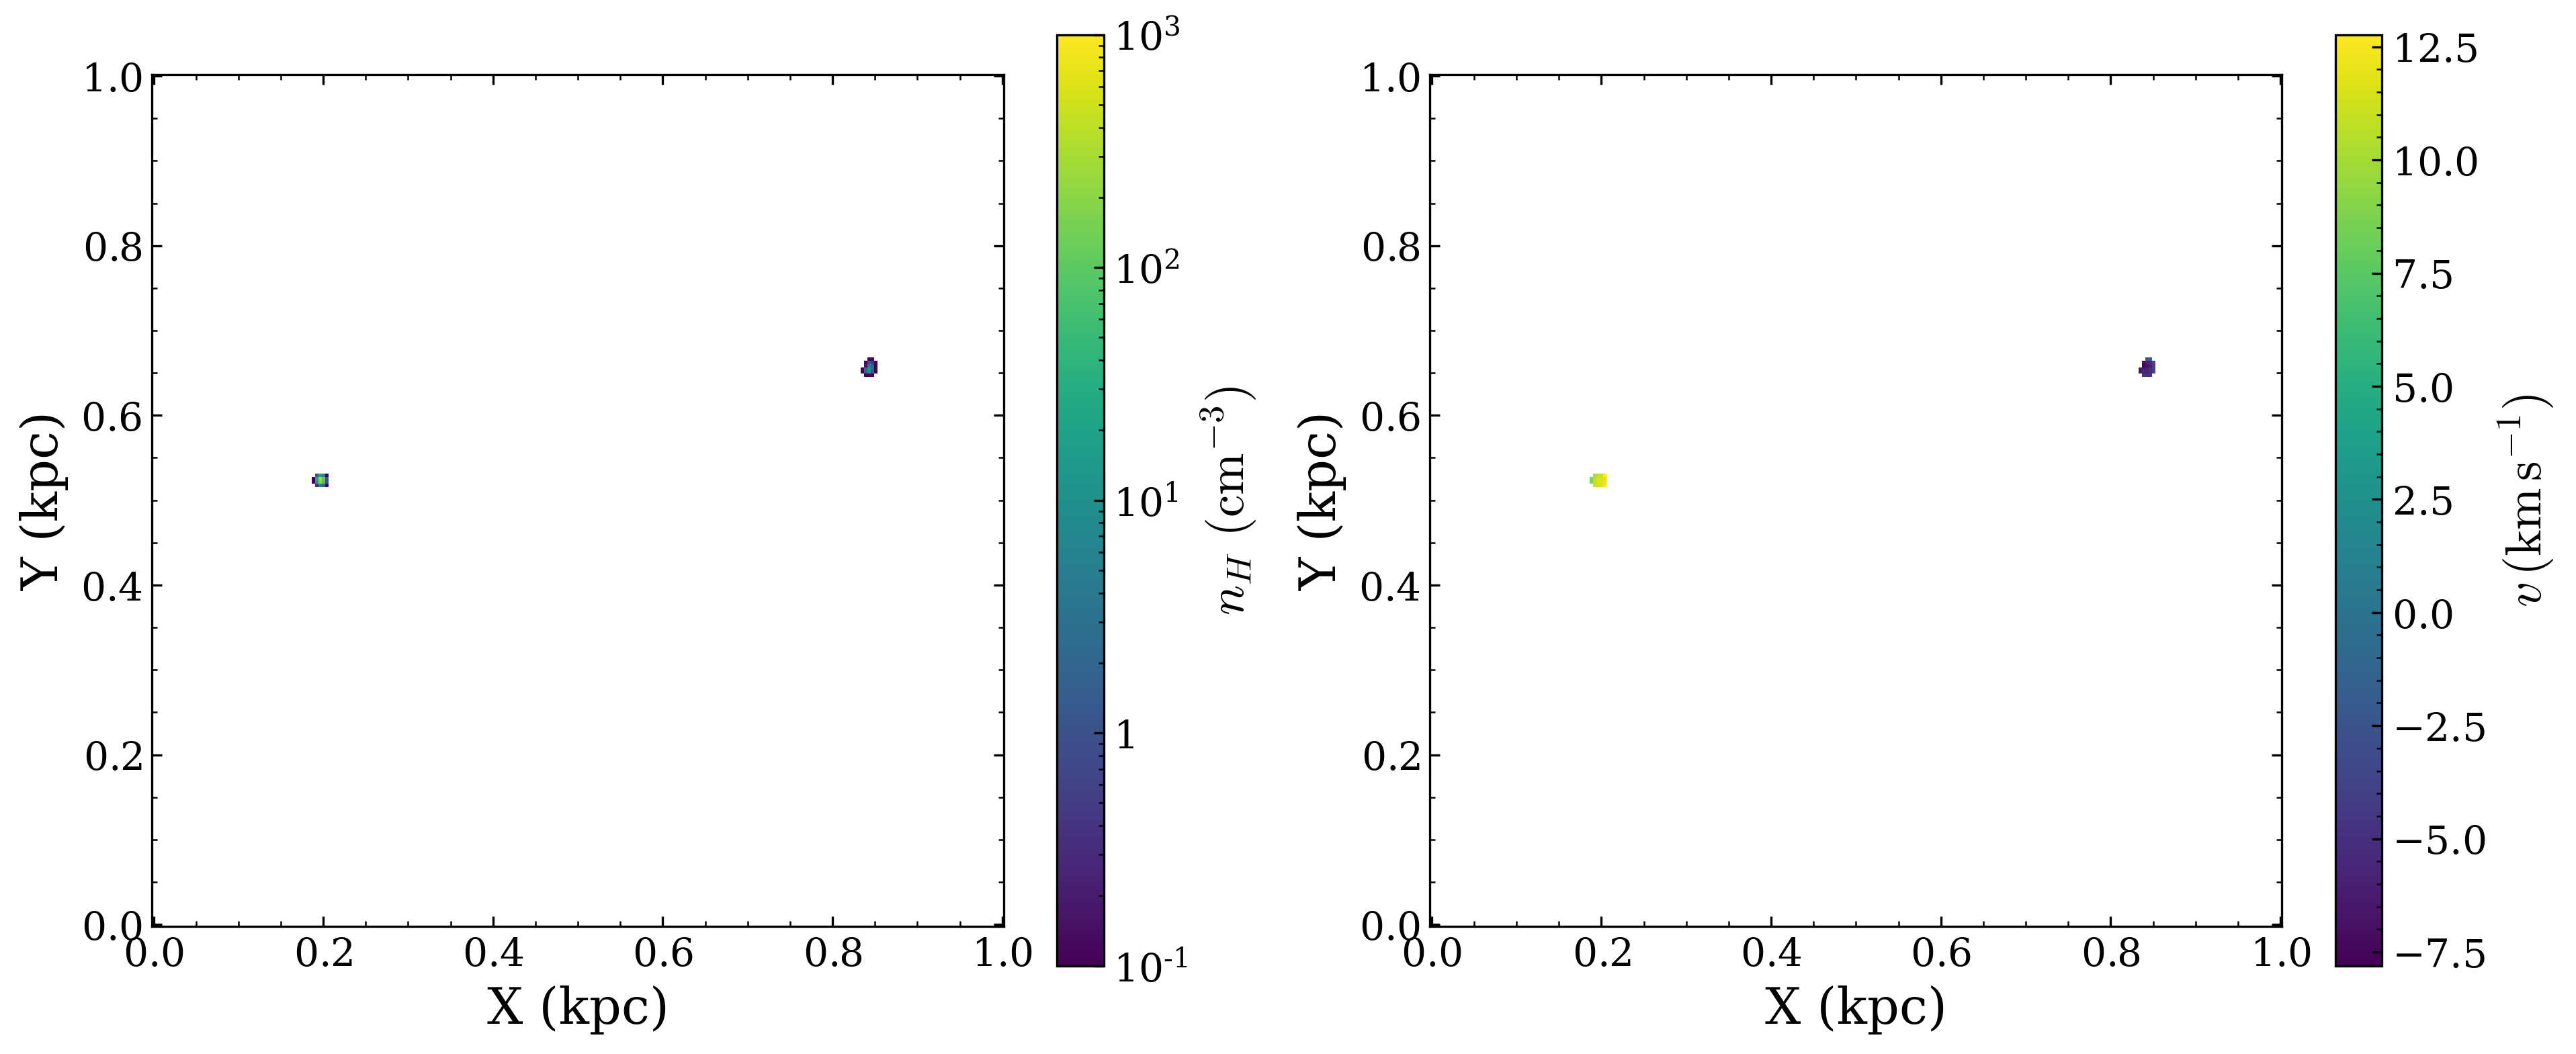

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
smallField.plot_density_slice(index=90, axis=2, ax=ax[0])
smallField.plot_velocity_slice(component=0, index=90, axis=2, ax=ax[1])
plt.show()